## Classical simulation of triple dot

This classical simulation of a square dot system (2by2) investigates possible ways to visualize charge states in conventional "honeycomb" fashion. The goal is to investigate if all important points in gate space can be found in a single gate plane.

### Import packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from qtt.simulation.classicaldotsystem import ClassicalDotSystem, SquareDot

<IPython.core.display.Javascript object>

/Users/laurens/Qcodes/qtt/qtt/pmatlab.py:174: UserWarning: pmatlab: could not load skimage.filters, not all functionality is available
  warnings.warn('pmatlab: could not load skimage.filters, not all functionality is available')


### Initialize dot system

In [2]:
DotSystem = SquareDot(maxelectrons=3)

### Standard Honeycomb example

Let's try a 'standard' honeycomb (i.e. changing 2 plunger gates).

#### Help functions for calculating gate planes

In [3]:
def create_linear_gate_matrix(gate_points, steps_x, steps_y):
    x_y_start = gate_points[0]
    x_end = gate_points[1]
    y_end = gate_points[2]
    step_x = ((x_end-x_y_start) * 1.0 / (steps_x-1))
    step_y = ((y_end-x_y_start) * 1.0 / (steps_y-1))
    return [[start_x+i*step_x for i in range(steps_x)] for start_x in [x_y_start+i*step_y for i in range(steps_y)]]

def calculate_end_points(ref_point,ref_value,dirVecX,dirVecY,rangeX,rangeY):
    gate_points = []
    gate_points.append(ref_value-(rangeX*(1-ref_point[0])*dirVecX)-(rangeY*(1-ref_point[1])*dirVecY))
    gate_points.append(gate_points[0]+rangeX*dirVecX)
    gate_points.append(gate_points[0]+rangeY*dirVecY)
    return gate_points

def create_all_gate_matrix(ref_point, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY):
    gate_matrix=np.zeros((len(ref_value),pointsX,pointsY))
    for gate in range(len(ref_value)):
        end_points = calculate_end_points(ref_point,ref_value[gate],dirVecX[gate],dirVecY[gate],rangeX,rangeY)
        gate_matrix[gate]= create_linear_gate_matrix(end_points,pointsX,pointsY)
    return gate_matrix

#### Define gate plane and run simulation

simulatehoneycomb: 3.04 [s]


<IPython.core.display.Javascript object>


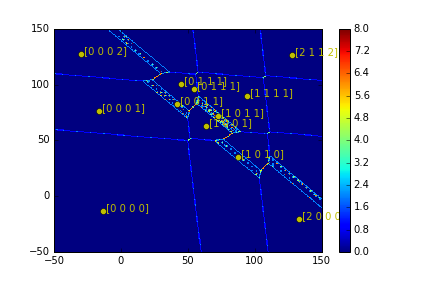

In [7]:
%matplotlib notebook
P1 = 50.0
P2 = 50.0
P3 = 50.0
P4 = 50.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 0.0, 1.0]
dirVecX = [1.0, 0.0, 0.0, 0.0]
rangeX = 200
rangeY = 200
pointsX = 400
pointsY = 400

end_points_x = calculate_end_points(ref_pt,ref_value[0],dirVecX[0],dirVecY[0],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[3],dirVecX[3],dirVecY[3],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'yo')
    gate_point = ref_value
    gate_point[0] = event.xdata
    gate_point[3] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

simulatehoneycomb: 3.19 [s]


<IPython.core.display.Javascript object>


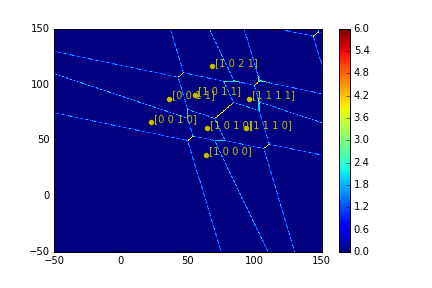

In [8]:
%matplotlib notebook
P1 = 50.0
P2 = 50.0
P3 = 50.0
P4 = 50.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3, P4]
dirVecY = [0.0, 0.0, 1.0, 0.0]
dirVecX = [1.0, 0.0, 0.0, 0.0]
rangeX = 200
rangeY = 200
pointsX = 400
pointsY = 400

end_points_x = calculate_end_points(ref_pt,ref_value[0],dirVecX[0],dirVecY[0],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[2],dirVecX[2],dirVecY[2],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

fig = plt.figure()
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()

def onclick(event):
    plt.plot(event.xdata, event.ydata, 'yo')
    gate_point = ref_value
    gate_point[0] = event.xdata
    gate_point[2] = event.ydata
    charge_state = DotSystem.calculate_ground_state(gate_point)
    string = ' ' + np.array_str(charge_state)
    plt.annotate(string, xy = (event.xdata, event.ydata), color = 'y')
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)